# <font color=darkred> Explore-exploit dilemma </font>

## <font color=darkblue> Thompson Sampling Algorithm on a Bernoulli distribution</font>

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats

In [126]:
bandit_probability = [0.2,0.5,0.75]
a=b=1
alpha=[1,1,1]
beta=[1,1,1]
rv1, rv2, rv3 = stats.beta(a,b),stats.beta(a,b),stats.beta(a,b) #beta distribution objects initialized
posterior = [rv1,rv2,rv3] 
bandit_tries = [0,0,0]
N_tries=10000

win_rate = np.zeros(N_tries)
reward_vector=np.zeros(N_tries)
total_reward = 0

num_optimal = 0
optimal_bandit = bandit_probability.index(max(bandit_probability))

In [112]:
#returns 1 (success) with the probability of the slot machine picked up and 0 otherwise
# i is the parameter representing the slot machine which is played

def pull(i):
    global total_reward
    bandit_tries[i]+=1 
    est = random.random()
    if est < bandit_probability[i]:
        x = 1     #x is the reward of the slot machine which is either 0 or 1
        total_reward+=1
        return(x)
    else : 
        x = 0
        return(x)  

In [113]:
#This function updates the estimated win rates of the slot machines, by calculating the samples mean

def update(i,x):
    global posterior, alpha, beta
    alpha[i] += x
    if x==0:
        beta[i]+=1
    posterior[i]=stats.beta(alpha[i],beta[i])

In [114]:
#returns a sample of the beta distributions of posterior
def sample():
    global posterior
    return([posterior[i].rvs() for i in range(len(posterior))])

0.3159111918173635 0.25548038325367856 0.4464406015592134


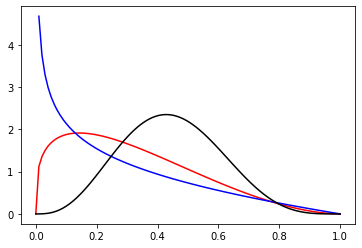

In [115]:
rv1 = stats.beta(1.3,2.8)
rv2 = stats.beta(0.7,2)
rv3 = stats.beta(4,5)
s1,s2,s3 = 0,0,0
x=np.linspace(0,1,100)    
plt.plot(x, rv1.pdf(x), 'r')
plt.plot(x, rv2.pdf(x), 'b')
plt.plot(x, rv3.pdf(x), 'k')
for i in range(1000):
    s1 += rv1.rvs()
    s2 += rv2.rvs()
    s3 += rv3.rvs()
print(s1/1000,s2/1000,s3/1000)    

In [123]:
def thompson_sampling():
    global num_optimal, num_times_exploited, num_times_explored, posterior
    for i in range (N_tries):
        #draw one sample out of each posterior distribution
        L = sample()
        
        #greedy way to choose the bandit with the highest sample
        j = L.index(max(L))
        if j == optimal_bandit:
            num_optimal+=1
        reward = pull(j)
        reward_vector[i]=reward
        update(j,reward)

In [127]:
thompson_sampling()

The total reward earned is 7472
The overall win rate is 74.72%
Number of times each bandit was chosen : [14, 40, 9946]
The ratio of optimal choice meaning the number of times the maximum win rate slot machine was chosen divided by the number of times slot machines were pulled is 99.46%


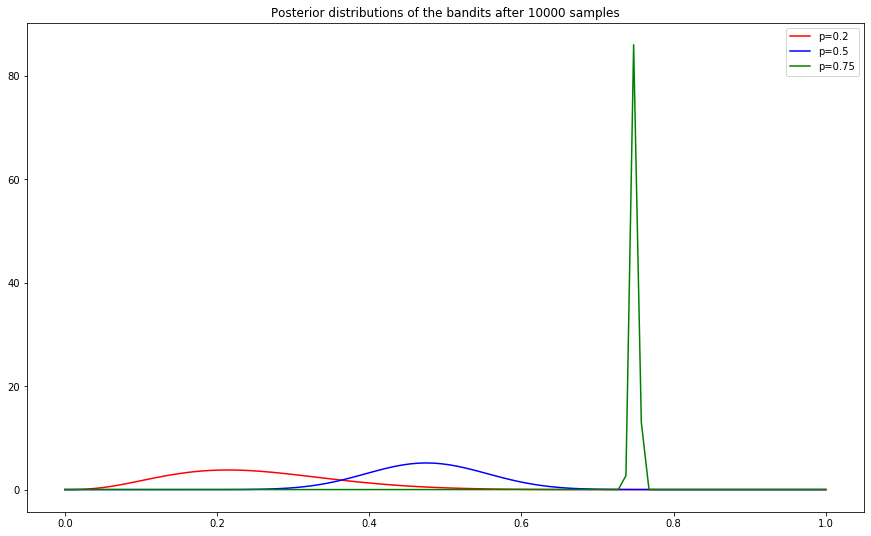

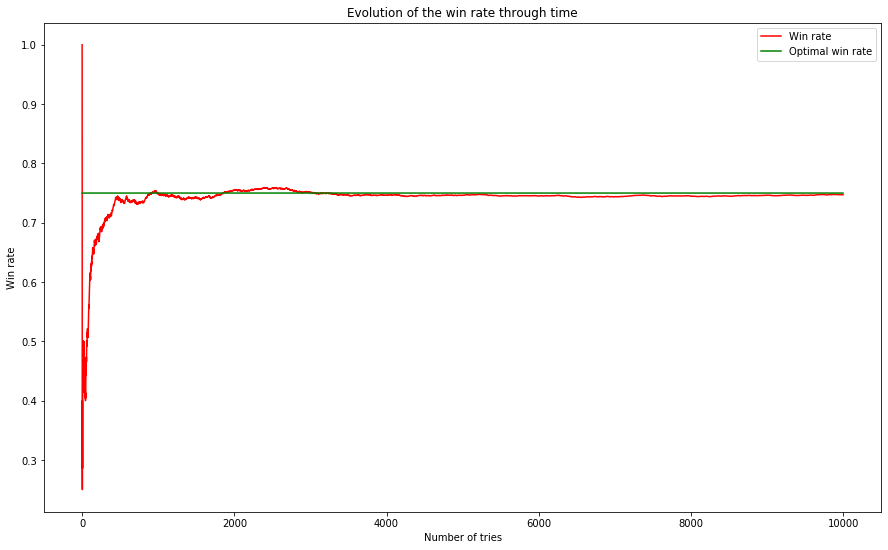

In [130]:
print("The total reward earned is "+str(total_reward))
print("The overall win rate is "+str(100*total_reward/N_tries)+"%")
print("Number of times each bandit was chosen : "+str(bandit_tries))
print("The ratio of optimal choice meaning the number of times the maximum win rate slot machine was chosen divided by the number of times slot machines were pulled is "+str(100*num_optimal/N_tries)+"%")

win_rate=np.cumsum(reward_vector)/(np.arange(N_tries)+1)
optimal_win_rate=np.ones(N_tries)*max(bandit_probability)

x=np.linspace(0,1,100) 
plt.figure(figsize=(15, 9))
plt.plot(x,posterior[0].pdf(x), 'r', label='p=0.2')
plt.plot(x,posterior[1].pdf(x), 'b', label='p=0.5')
plt.plot(x,posterior[2].pdf(x), 'g', label='p=0.75')
plt.legend()
plt.title("Posterior distributions of the bandits after "+str(N_tries)+" samples")

plt.figure(figsize=(15, 9))
plt.plot(win_rate[:], 'r', lw=1.5, label='Win rate')
plt.plot(optimal_win_rate[:], 'g', lw=1.5, label='Optimal win rate')
plt.xlabel('Number of tries')
plt.ylabel('Win rate')
plt.legend()
plt.title("Evolution of the win rate through time")
plt.show()